In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
def load_smiles(smi_path):
    with open(smi_path, 'r') as f:
        smiles = f.readlines()
        smiles = [s.strip() for s in smiles]
    return smiles

In [3]:
smiles_path = "/mnt/ssd2/Chem/photopolymerization_initiator/ML/MolGen/data/mydata/oxime_ester.smi"
smiles = load_smiles(smiles_path)

In [4]:
print(smiles[:10])

['CC(C)(C)C1CCC(=NOC(=O)c2ccc([N+](=O)[O-])cc2)CC1', 'O=C1C=CC(=NOC(=O)c2cccc([N+](=O)[O-])c2)C=C1', 'O=C(ON=C1CCCCCCCCCCC1)c1ccc(F)cc1', 'Cc1ncc(COC(=O)c2ccccc2)c(C=NOC(=O)c2ccccc2)c1OC(=O)c1ccccc1', 'CCOC(=O)/C(=N\\OC(=O)c1ccc(Cl)cc1)c1csc(NC(=O)c2ccc(Cl)cc2)n1', 'O=C(O/N=C\\c1cc([N+](=O)[O-])ccc1SC1CCCCC1)c1ccc(Cl)cc1', 'CC(=O)Nc1ccc(/C=N\\OC(C)=O)cc1', 'COc1ccccc1/C=N/OC(=O)c1cccc([N+](=O)[O-])c1', 'CC(C)(Oc1ccc(Cl)cc1)/C(N)=N/OC(=O)c1cccnc1', 'O=C(O/N=C/c1cc[n+]([O-])cc1)c1ccccc1']


In [5]:
smiles_length = [len(s) for s in smiles]

(array([ 8., 16., 14.,  9.,  5.,  8.,  0.,  1.,  0.,  3.]),
 array([ 29. ,  38.2,  47.4,  56.6,  65.8,  75. ,  84.2,  93.4, 102.6,
        111.8, 121. ]),
 <BarContainer object of 10 artists>)

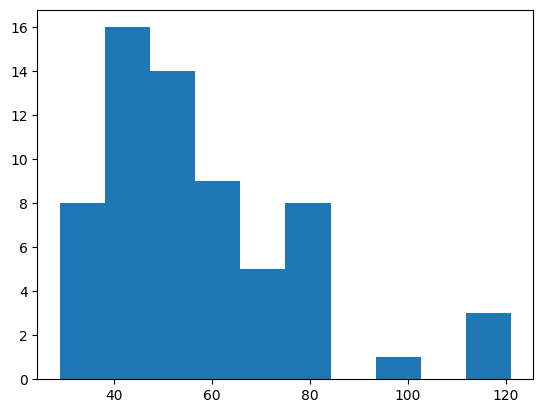

In [7]:
plt.hist(smiles_length)

In [ ]:
import pandas as pd
import os
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image, ImageDraw, ImageFont
from rdkit.Chem import AllChem, PandasTools

In [ ]:
def mol2img(mol, img_save_path, text=None):
    # 分子の画像を生成
    img = Draw.MolToImage(mol, size=(300, 300))
    draw = ImageDraw.Draw(img)

    if text is not None:
        font = ImageFont.load_default()
        # テキストの位置を左上に変更
        text_position = (10, 10) # 左上
        draw.text(text_position, text, fill=(0, 0, 0), font=font)

    # 画像をファイルに保存
    img.save(img_save_path)

In [ ]:
csv_path = "/mnt/ssd2/Chem/photopolymerization_initiator/ML/MolGen/filter_20240112011535.csv"
df = pd.read_csv(csv_path)

In [7]:
t1_thread_hold = 2.0
s1_thread_hold = 3.5
s1_osc_thread_hold = 1.0
similarity_thread_hold = 0.7
df_selected = df[((df["T1"] > t1_thread_hold) & (df["S1"] < s1_thread_hold) & (df["S1_osc"] > s1_osc_thread_hold) & (df["similarity"] < similarity_thread_hold))]
df_selected

,Smiles,T1,S1,S1_osc,similarity,Scaffold
44,C1C(C)(CC)CCn2c3ccc(C#Cc4ccc(C=NOC(C)=O)cc4)cc...,2.005534,3.374749,1.584115,0.363636,C(#Cc1ccc2c(c1)C1=CCCCCN12)c1ccccc1
855,CCC(=O)O\N=C/c1cc2ccc1-c1ccc(N(c3ccccc3)c3cccc...,2.264805,3.486293,1.026367,0.428571,c1ccc(N(c2ccccc2)c2ccc3c(c2)OCc2ccc-3cc2)cc1
1989,CCCCCCN1c2ccc(C#Cc3ccc(/C=N\OC(=O)c4ccccc4)cc3...,2.244015,3.356254,1.188039,0.676923,O=C(O/N=C\c1ccc(C#Cc2ccc3c(c2)Sc2cc(-c4ccccc4)...
3323,c1c(Sc2ccc(C#Cc3ccc(/C=N\OC(=O)C)cc3)cc2)cc(C#...,2.035686,3.283830,2.231208,0.500000,C(#Cc1ccc(Sc2cccc(C#Cc3ccccc3)c2)cc1)c1ccccc1
4031,C/C(=N\OC(=O)c1ccccc1)c1ccc2c(c1)Sc1cc(-c3ccc(...,2.370831,3.467956,1.270928,0.473684,O=C(ON=Cc1ccc2c(c1)Sc1cc(-c3ccccc3)ccc1N2c1ccc...
...,...,...,...,...,...,...
422557,N(C(C)=O)/N=C(/C)C(c1ccc(C#Cc2ccc(N(C)C)cc2)cc...,2.030307,3.420253,1.017655,0.500000,C(#Cc1ccccc1)c1ccccc1
422577,CC(=O)O\N=C\c1ccc2oc(-c3ccc(C#Cc4ccccc4)cc3)nc2c1,2.216614,3.491756,1.333011,0.404762,C(#Cc1ccc(-c2nc3ccccc3o2)cc1)c1ccccc1
422808,COCCn1c(C#Cc2ccc(Nc3cccc(C#Cc4ccc(C=NOC(C)=O)c...,2.111025,3.376153,2.058997,0.391304,C(#Cc1cccc(Nc2ccc(C#Cc3nc4ccccc4[nH]3)cc2)c1)c...
423121,CCCCCCN1c2ccccc2Sc2cc(C#Cc3ccc(C=NOC(C)=O)cc3)...,2.292698,3.391898,1.096038,0.583333,C(#Cc1ccc2c(c1)Sc1ccccc1N2)c1ccccc1


In [ ]:
!pip list | grep rdkit

In [8]:
df_selected.to_csv("selected.csv")

In [9]:
save_dir = "/mnt/ssd2/Chem/photopolymerization_initiator/ML/MolGen/data/results/imgs2"
os.makedirs(save_dir, exist_ok=True)

In [11]:
smiles_list = df_selected["Smiles"].values.tolist()

In [13]:
for i, smi in enumerate(smiles_list):
    save_path = os.path.join(save_dir, f"{i}.png")
    mol = Chem.MolFromSmiles(smi)
    mol2img(mol, save_path)